# <font color='blue'>RIO- 125 Classification Model - Build a Model that Classifies the Side Effects of a Drug</font>

In [1]:
pip install Faker

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import required libraries

import pandas as pd
import numpy as np
from faker import Faker   #Faker is a Python library that allows to generate fake data

# Plotting the data:
import matplotlib.pyplot as plt
import seaborn as sns 

# Preprocessing the dataset:
from sklearn.preprocessing import LabelEncoder

# Split the dataset into training and testing sets:
from sklearn.model_selection import train_test_split

# Classification algorithms:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


# Analysis of classificaiton algorithms:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Model Selection
from sklearn.model_selection import GridSearchCV


# Remove warnings:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
#Read the dataset and display first 5 rows of the data

data = pd.read_csv(r'C:\Users\HP\Desktop\Intership\webmd.csv')
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


# <font color='green'> Data Understanding</font>

In [4]:
#Check number of rows and columns of the dataset

data.shape

(362806, 12)

In [5]:
#display the columns of the data

data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [6]:
# Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [7]:
#type of each columns in the data

data.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [8]:
#display type of the data

type(data)

pandas.core.frame.DataFrame

In [9]:
# some basic statistical analysis about the data

data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [10]:
#dimensions of the data

data.ndim

2

# <font color='green'> Add fake names and races columns</font>

In [11]:
fake = Faker()

In [12]:
race = ['Black','White','Asian','Hispanic'] 

In [13]:
data['Name'] = [fake.name() for _ in range(len(data))]
data['Race'] = [fake.random_element(race) for _ in range(len(data))]

In [14]:
# Rename the column sides
data = data.rename(columns={'Sides':'SideEffects'})

In [15]:
# Set the columns 'Name' and 'Race' as the first and second level
data = data.set_index(['Name', 'Race'])

# Reset the index to move 'Name' and 'Race' back to columns
data = data.reset_index()

In [16]:
data.head(2)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,SideEffects,UsefulCount
0,Eugene Reyes DDS,Black,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Ryan Baker,Black,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1


In [17]:
#check unique values

data.nunique()

Name             180816
Race                  4
Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250167
Satisfaction          7
Sex                   3
SideEffects        1651
UsefulCount         148
dtype: int64

In [18]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Name           362806 non-null  object        
 1   Race           362806 non-null  object        
 2   Age            362806 non-null  object        
 3   Condition      362806 non-null  object        
 4   Date           362806 non-null  datetime64[ns]
 5   Drug           362806 non-null  object        
 6   DrugId         362806 non-null  int64         
 7   EaseofUse      362806 non-null  int64         
 8   Effectiveness  362806 non-null  int64         
 9   Reviews        362769 non-null  object        
 10  Satisfaction   362806 non-null  int64         
 11  Sex            362806 non-null  object        
 12  SideEffects    362806 non-null  object        
 13  UsefulCount    362806 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(8)
memory usa

In [20]:
data.Drug.value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

# <font color='green'> Feature Description</font>

In [21]:
# Number of numerical columns & Number of categorical columns in the DataFrame

numerical_columns = data.select_dtypes(include=['float', 'int']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print(f"Number of Numerical Columns: {len(numerical_columns)}")
print(f"Number of Categorical Columns: {len(categorical_columns)}")

Number of Numerical Columns: 5
Number of Categorical Columns: 8


# <font color='green'> Exploratory data analysis</font> 

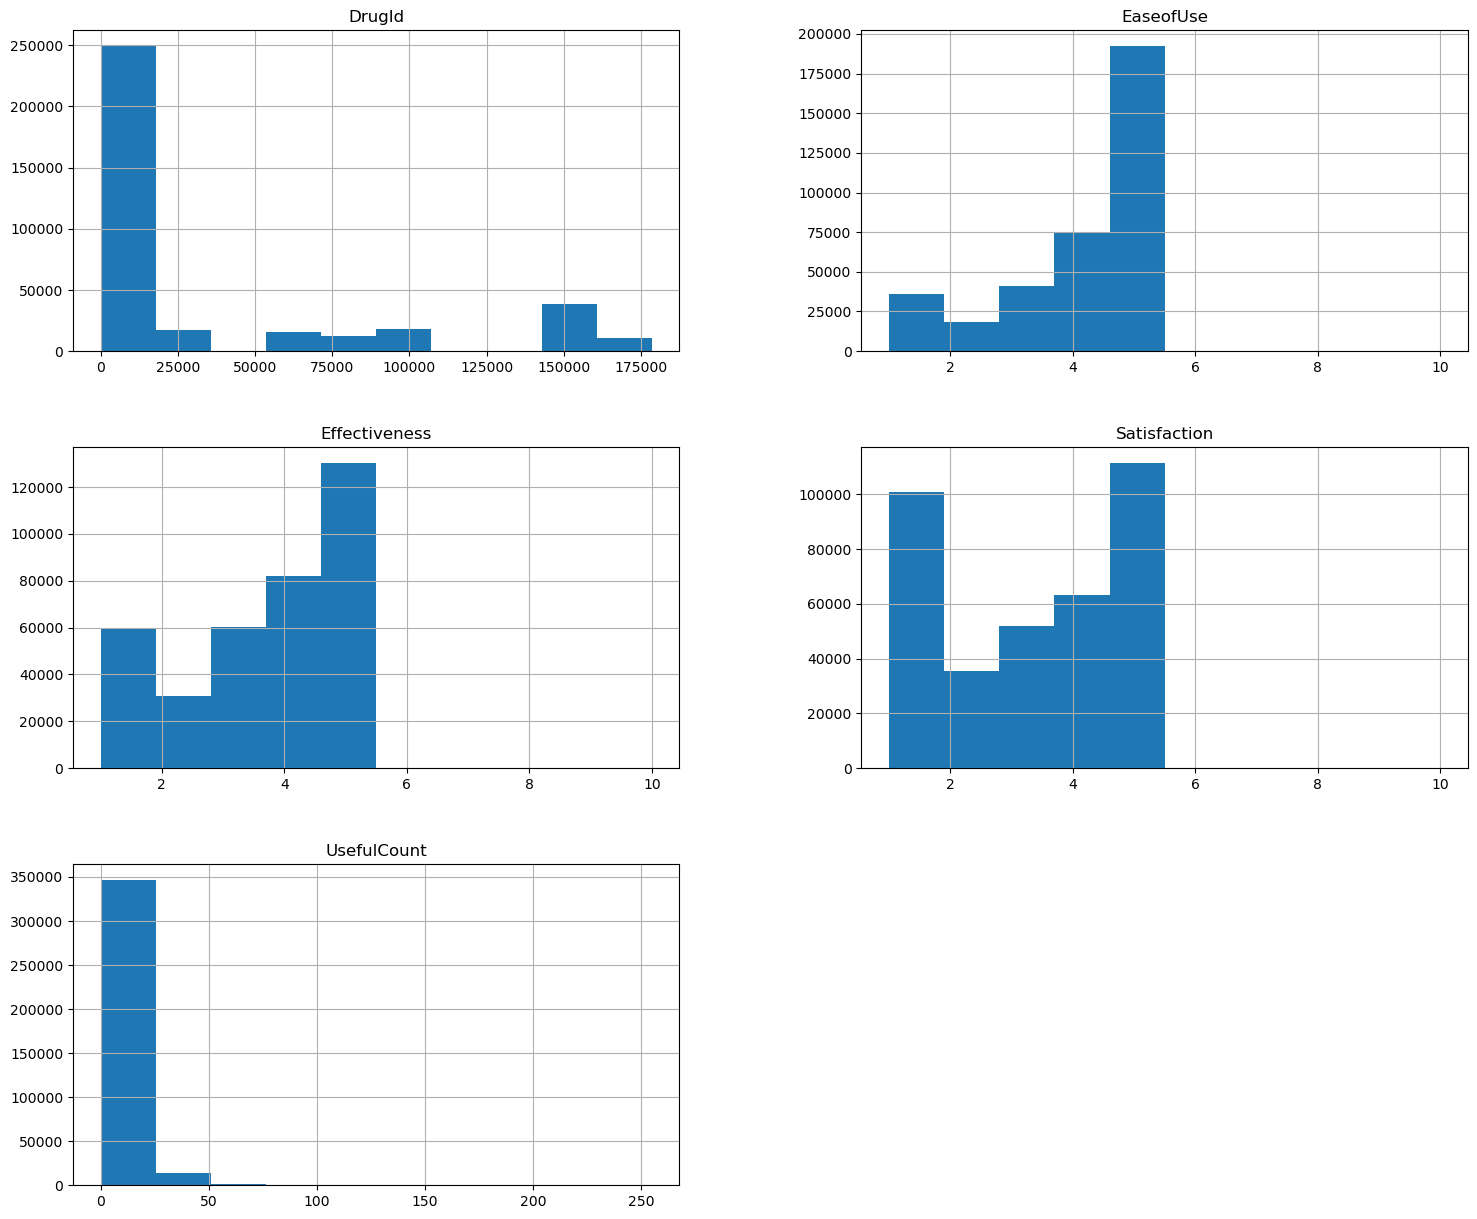

In [22]:
#plot graphs for float and int data types

freqgraph = data.select_dtypes(include=['float' ,'int'])
freqgraph.hist(figsize=(18,15))
plt.show()

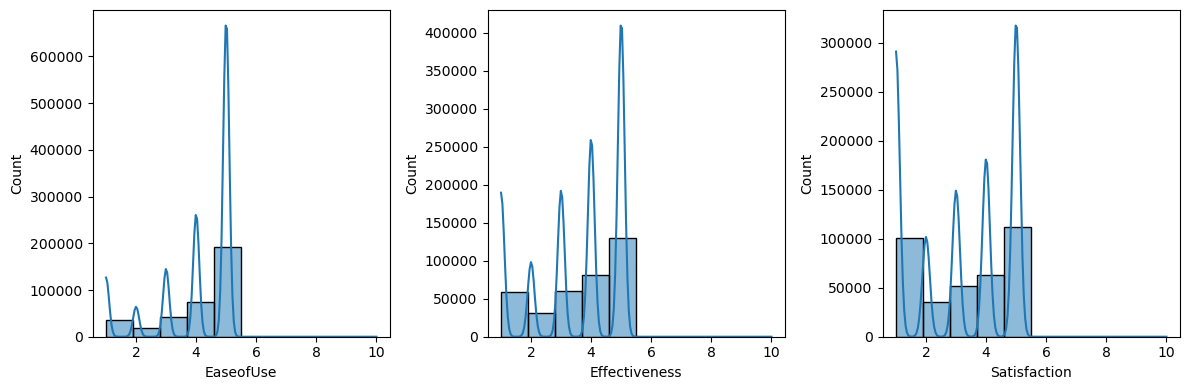

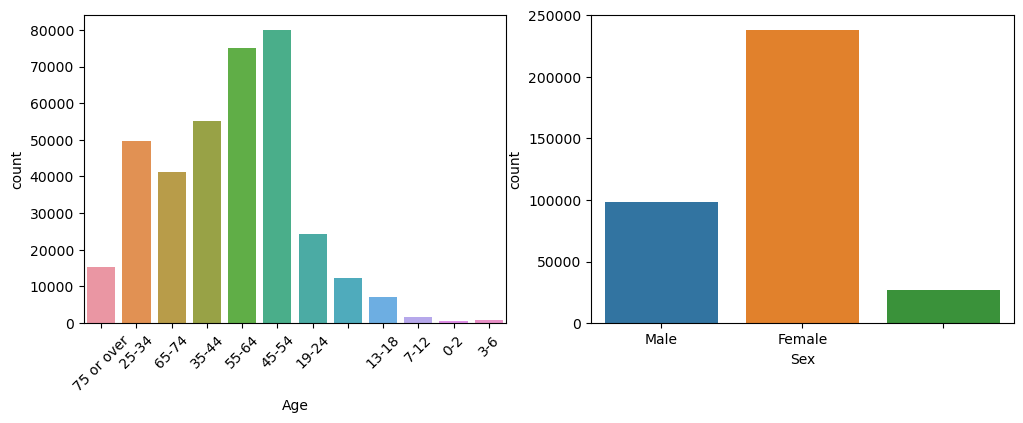

In [23]:
# Histograms of some numerical columns

plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.histplot(data=data, x='EaseofUse', bins=10, kde=True)
plt.subplot(132)
sns.histplot(data=data, x='Effectiveness', bins=10, kde=True)
plt.subplot(133)
sns.histplot(data=data, x='Satisfaction', bins=10, kde=True)
plt.tight_layout()


# Bar Charts of some categorical columns

plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.countplot(data=data, x='Age')
plt.xticks(rotation=45)
plt.subplot(122)
sns.countplot(data=data, x='Sex')
plt.show()


The "Effectiveness" and "EaseofUse" columns show that some individuals rated the drugs very highly in terms of effectiveness and ease of use, with ratings of 5. This suggests that some drugs have received positive reviews from users.

The "Satisfaction" column indicates that individuals in the dataset generally expressed satisfaction with the medications they reviewed. Ratings of 5 suggest high levels of satisfaction.

Most of the patients are Female and around the age 45-54 have diseases.

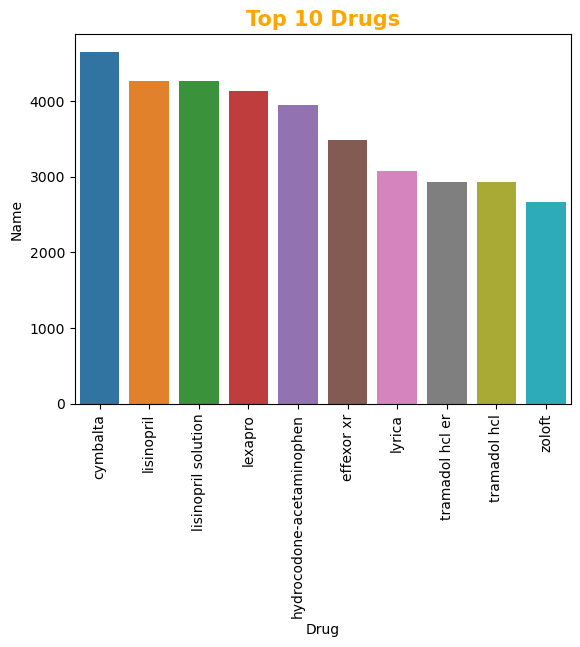

In [24]:
# Top 10 Drugs based on No. of Users

data_= data['Drug'].value_counts().head(10).reset_index()
data_.columns = ['Drug', 'Name']
sns.barplot(data=data_, x = 'Drug', y = 'Name')
plt.title("Top 10 Drugs",color='orange',fontweight='bold',fontsize = 15)
plt.xticks(rotation=90,fontsize=10)
plt.show()

Cymbalta tops the list followed by Lisinopril and all the 10 drugs has been used more than 2500 people.

Text(0, 0.5, 'Users')

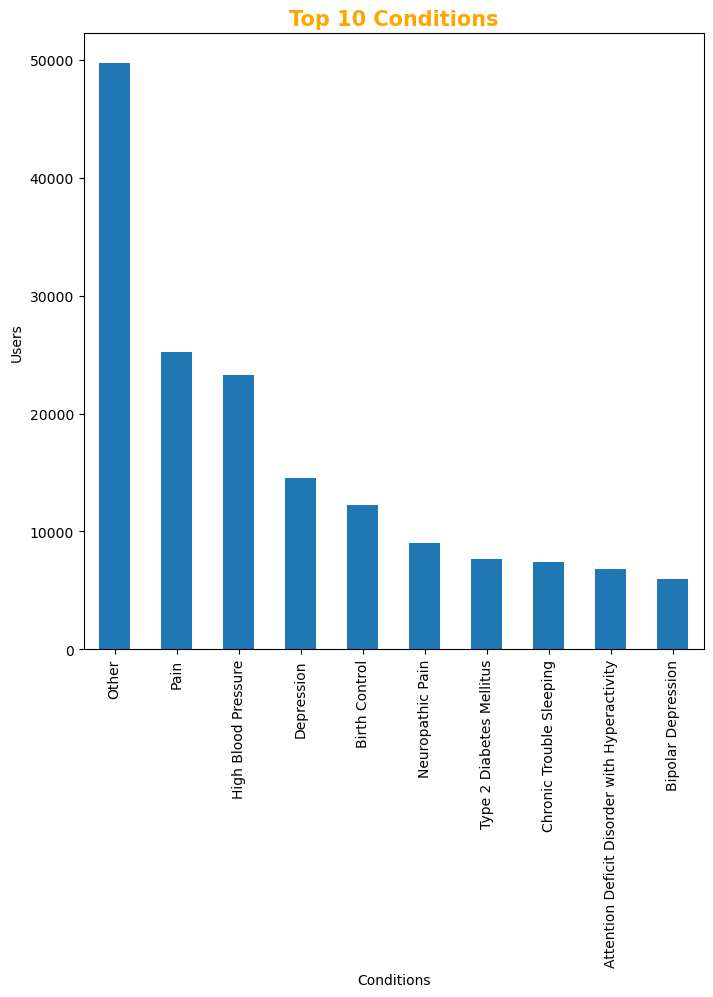

In [25]:
# Top 10 Conditions

data['Condition'].value_counts().nlargest(10).plot(kind='bar',figsize=(8,8))
plt.title("Top 10 Conditions",color='orange',fontweight='bold',fontsize = 15)
plt.xlabel('Conditions')
plt.ylabel('Users')

Around 50,000 users have reported other conditions and around more than 2500 people reporting pain

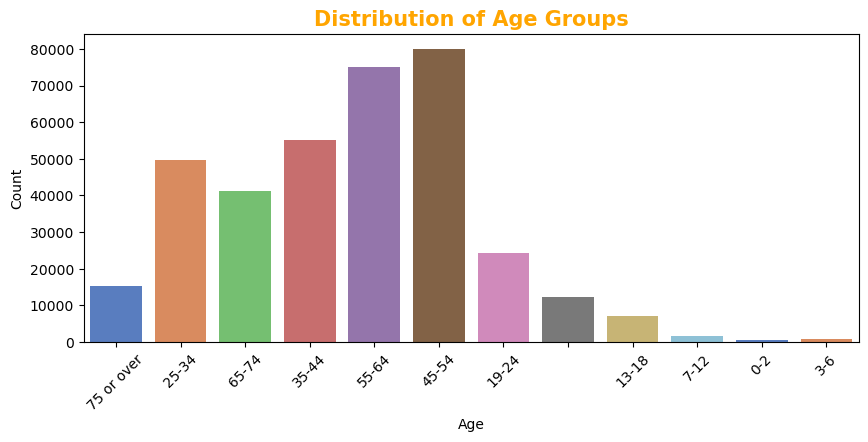

            Counts  Percentages (%)
45-54        80043        22.062204
55-64        75136        20.709691
35-44        55011        15.162649
25-34        49718        13.703742
65-74        41216        11.360341
19-24        24230         6.678500
75 or over   15226         4.196733
             12202         3.363230
13-18         7045         1.941809
7-12          1644         0.453135
3-6            838         0.230977
0-2            497         0.136988


In [26]:
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='Age', palette='muted')
plt.xticks(rotation=45)
plt.title('Distribution of Age Groups',color='orange',fontweight='bold',fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Summary statistics
age_counts = data['Age'].value_counts()
age_percentages = (age_counts / age_counts.sum()) * 100
age_summary = pd.DataFrame({'Counts': age_counts, 'Percentages (%)': age_percentages})
print(age_summary)


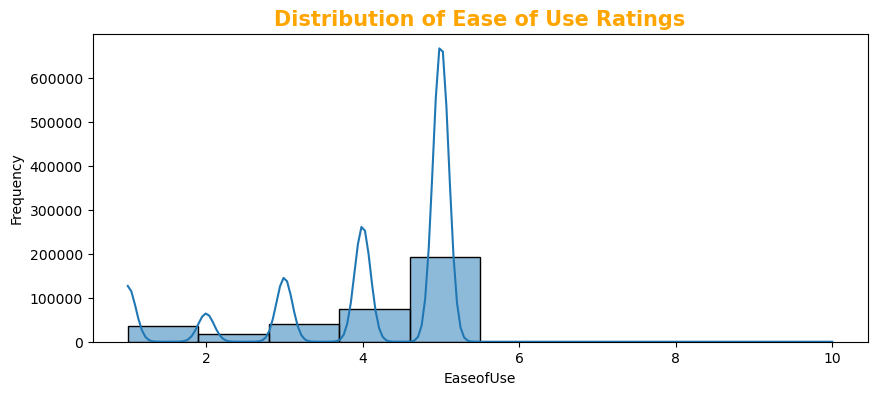

Mean EaseofUse: 4.02
Median EaseofUse: 5.00
Standard Deviation EaseofUse: 1.32


In [27]:
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='EaseofUse', bins=10, kde=True)
plt.title('Distribution of Ease of Use Ratings',color='orange',fontweight='bold',fontsize = 15)
plt.xlabel('EaseofUse')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
easeofuse_mean = data['EaseofUse'].mean()
easeofuse_median = data['EaseofUse'].median()
easeofuse_std = data['EaseofUse'].std()
print(f"Mean EaseofUse: {easeofuse_mean:.2f}")
print(f"Median EaseofUse: {easeofuse_median:.2f}")
print(f"Standard Deviation EaseofUse: {easeofuse_std:.2f}")


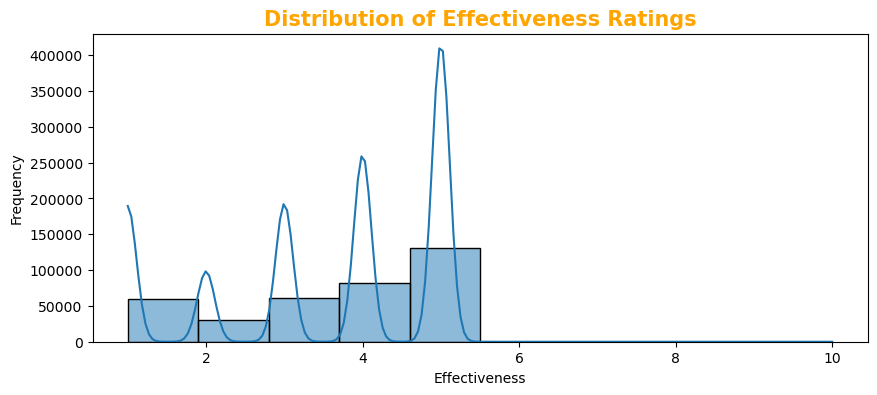

Mean Effectiveness: 3.53
Median Effectiveness: 4.00
Standard Deviation Effectiveness: 1.46


In [28]:
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='Effectiveness', bins=10, kde=True)
plt.title('Distribution of Effectiveness Ratings',color='orange',fontweight='bold',fontsize = 15)
plt.xlabel('Effectiveness')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
effectiveness_mean = data['Effectiveness'].mean()
effectiveness_median = data['Effectiveness'].median()
effectiveness_std = data['Effectiveness'].std()
print(f"Mean Effectiveness: {effectiveness_mean:.2f}")
print(f"Median Effectiveness: {effectiveness_median:.2f}")
print(f"Standard Deviation Effectiveness: {effectiveness_std:.2f}")


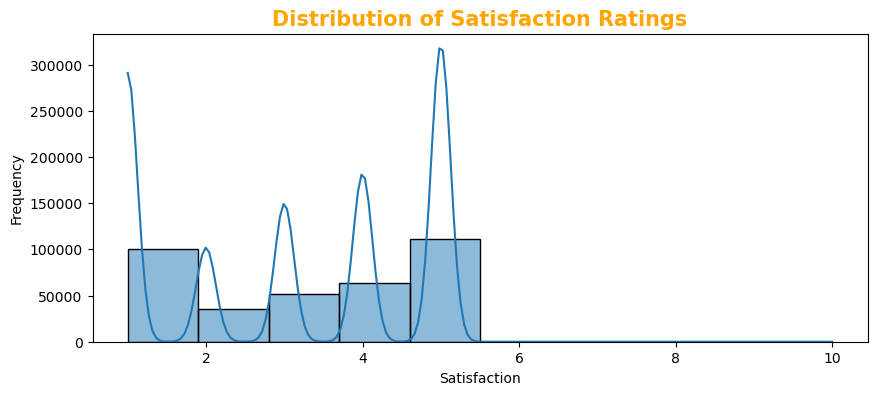

Mean Satisfaction: 3.14
Median Satisfaction: 3.00
Standard Deviation Satisfaction: 1.61


In [29]:
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='Satisfaction', bins=10, kde=True)
plt.title('Distribution of Satisfaction Ratings',color='orange',fontweight='bold',fontsize = 15)
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
satisfaction_mean = data['Satisfaction'].mean()
satisfaction_median = data['Satisfaction'].median()
satisfaction_std = data['Satisfaction'].std()
print(f"Mean Satisfaction: {satisfaction_mean:.2f}")
print(f"Median Satisfaction: {satisfaction_median:.2f}")
print(f"Standard Deviation Satisfaction: {satisfaction_std:.2f}")


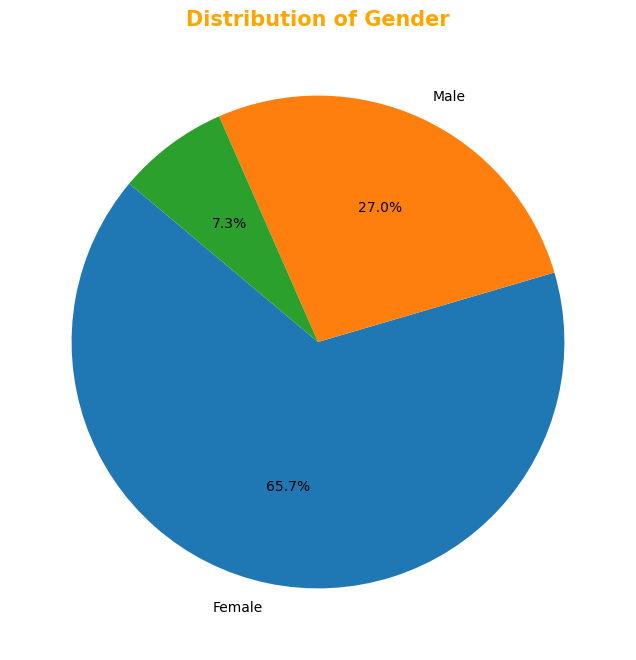

        Counts  Percentages (%)
Female  238226        65.662089
Male     98043        27.023533
         26537         7.314377


In [30]:
sex_counts = data['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender',color='orange',fontweight='bold',fontsize = 15)
plt.show()

# Summary statistics
sex_summary = pd.DataFrame({'Counts': sex_counts, 'Percentages (%)': (sex_counts / sex_counts.sum()) * 100})
print(sex_summary)


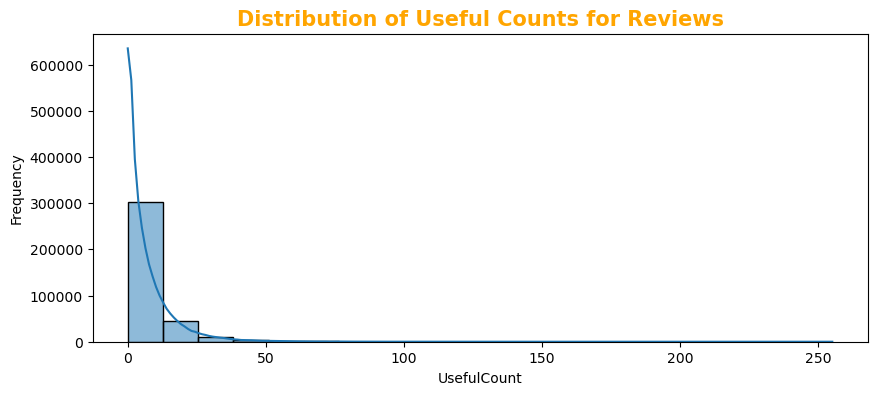

Mean UsefulCount: 6.74
Median UsefulCount: 4.00
Standard Deviation UsefulCount: 9.32


In [31]:
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='UsefulCount', bins=20, kde=True)
plt.title('Distribution of Useful Counts for Reviews',color='orange',fontweight='bold',fontsize = 15)
plt.xlabel('UsefulCount')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
usefulcount_mean = data['UsefulCount'].mean()
usefulcount_median = data['UsefulCount'].median()
usefulcount_std = data['UsefulCount'].std()
print(f"Mean UsefulCount: {usefulcount_mean:.2f}")
print(f"Median UsefulCount: {usefulcount_median:.2f}")
print(f"Standard Deviation UsefulCount: {usefulcount_std:.2f}")


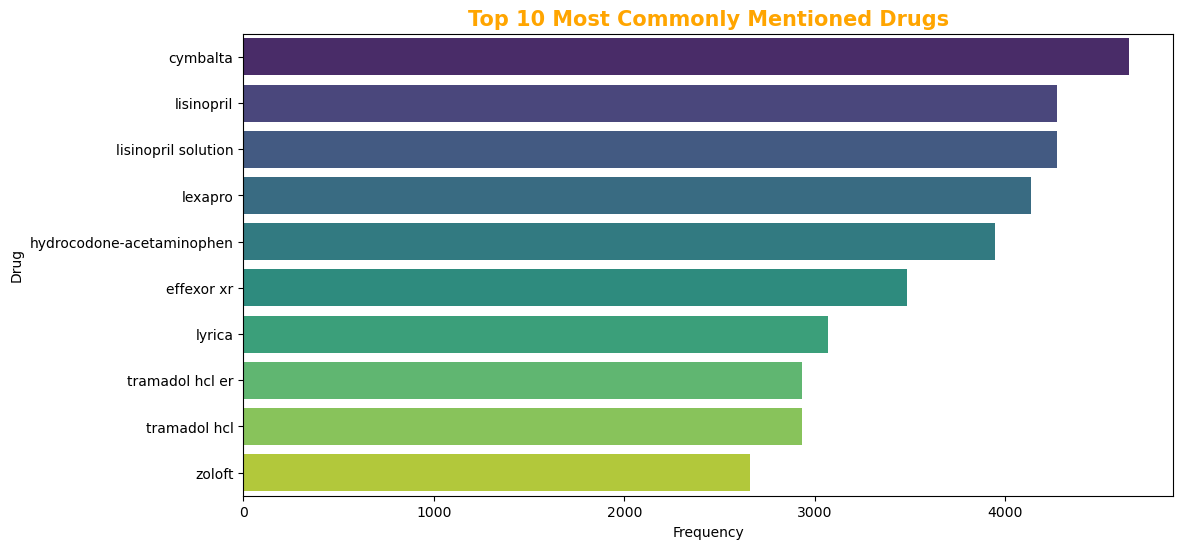

In [32]:
# Assuming you want to visualize the distribution of the top N drugs (change N as needed)
top_n_drugs = 10

# Get the top 10 most frequently mentioned drugs in the dataset
top_drugs = data['Drug'].value_counts().head(top_n_drugs)

# Create a bar chart to visualize the drug distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='viridis')
plt.title(f'Top {top_n_drugs} Most Commonly Mentioned Drugs',color='orange',fontweight='bold',fontsize = 15)
plt.xlabel('Frequency')
plt.ylabel('Drug')
plt.show()


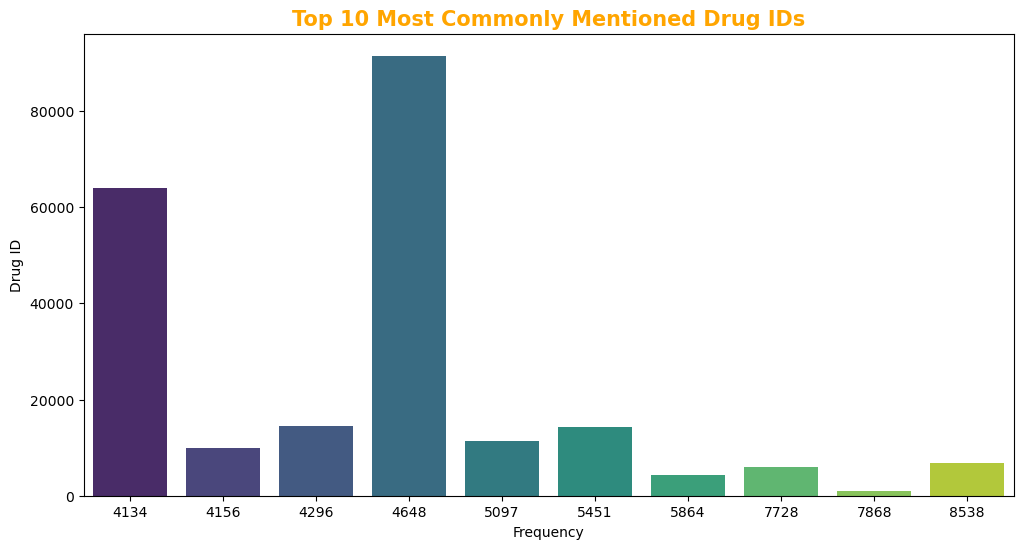

In [33]:
# Assuming you want to visualize the distribution of the top N Drug IDs (change N as needed)
top_n_drug_ids = 10

# Get the top 10 most frequently mentioned Drug IDs in the dataset
top_drug_ids = data['DrugId'].value_counts().head(top_n_drug_ids)

# Create a bar chart to visualize the Drug ID distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=top_drug_ids.values, y=top_drug_ids.index, palette='viridis')
plt.title(f'Top {top_n_drug_ids} Most Commonly Mentioned Drug IDs',color='orange',fontweight='bold',fontsize = 15)
plt.xlabel('Frequency')
plt.ylabel('Drug ID')
plt.show()


Text(0.5, 1.0, 'Users by Race and Gender')

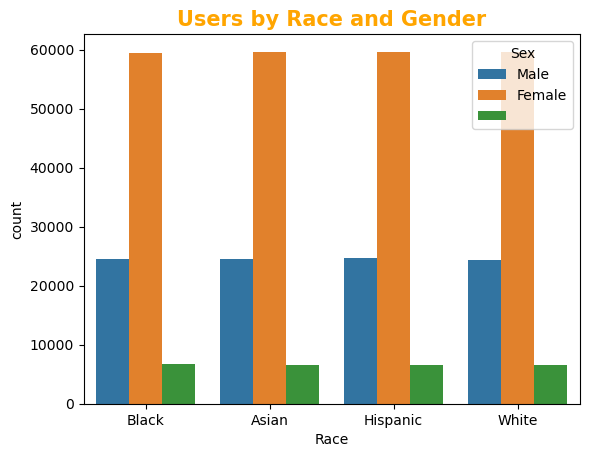

In [34]:
sns.countplot(x='Race',hue='Sex',data=data)
plt.title("Users by Race and Gender",color='orange',fontweight='bold',fontsize = 15)

Text(0.5, 1.0, 'Users by Age and Gender')

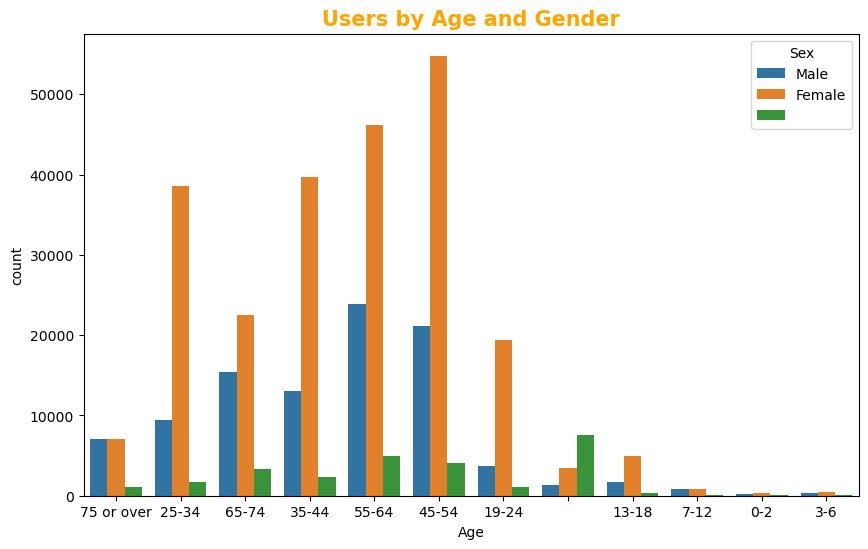

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data)
plt.title("Users by Age and Gender",color='orange',fontweight='bold',fontsize = 15)

Text(0, 0.5, 'Count')

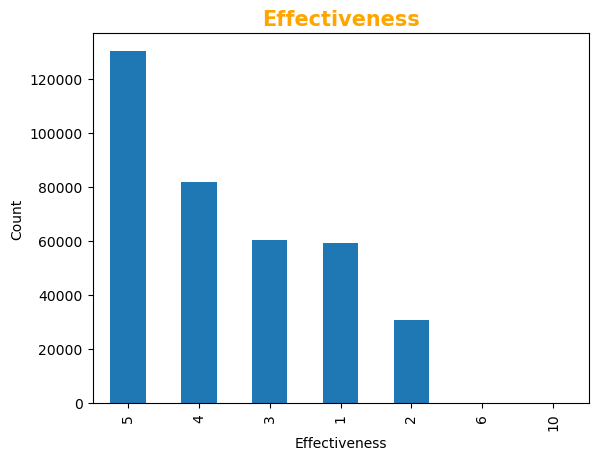

In [36]:
data['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness",color='orange',fontweight='bold',fontsize = 15)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

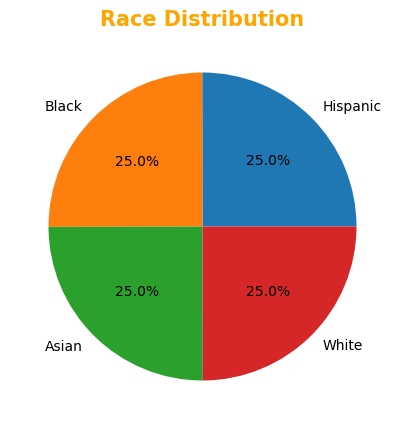

In [37]:
race_counts = data['Race'].value_counts()

plt.figure(figsize=(8, 5))

# Create pie chart
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%')

# Set title
plt.title('Race Distribution',color='orange',fontweight='bold',fontsize = 15)

# Show the pie chart
plt.show()

<Figure size 1000x800 with 0 Axes>

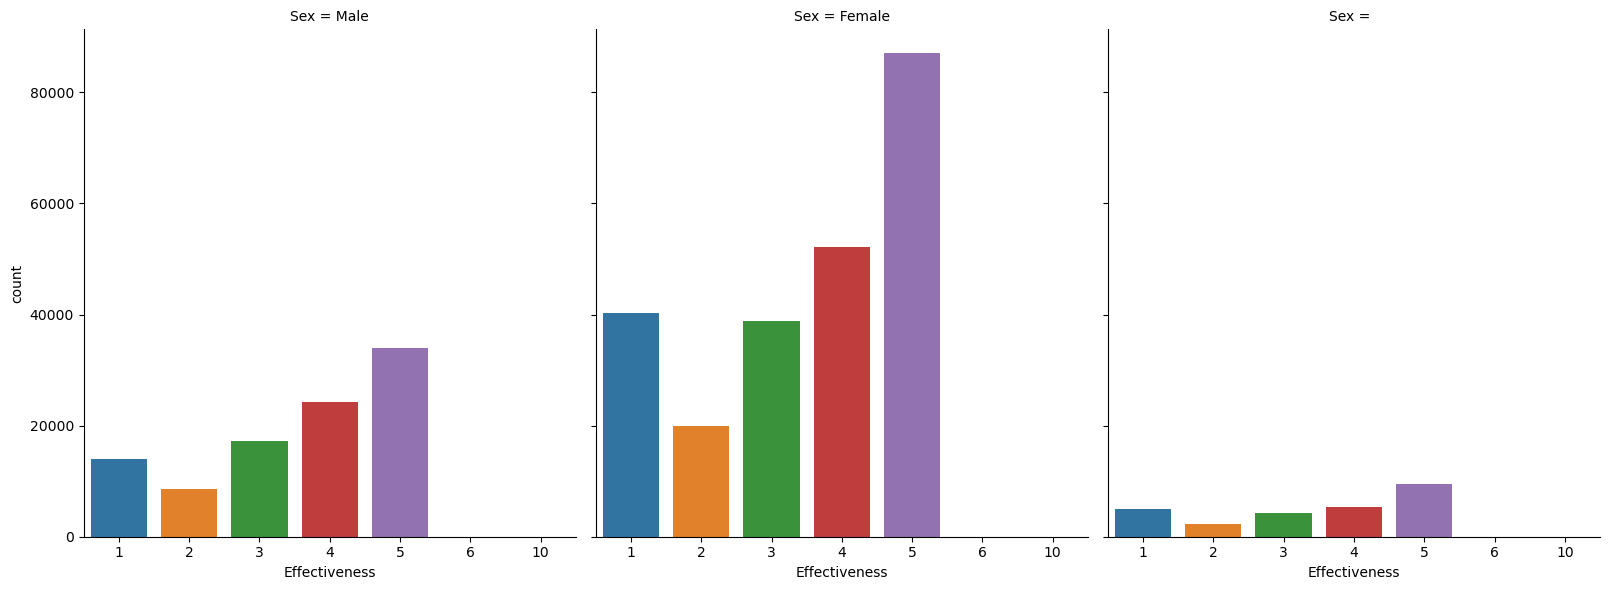

In [38]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=data, kind="count",
                height=6,aspect =.9);

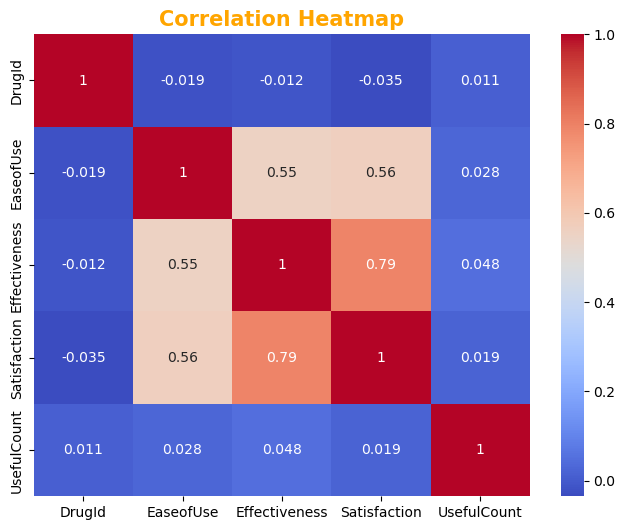

In [39]:
# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap',color='orange',fontweight='bold',fontsize = 15)
plt.show()

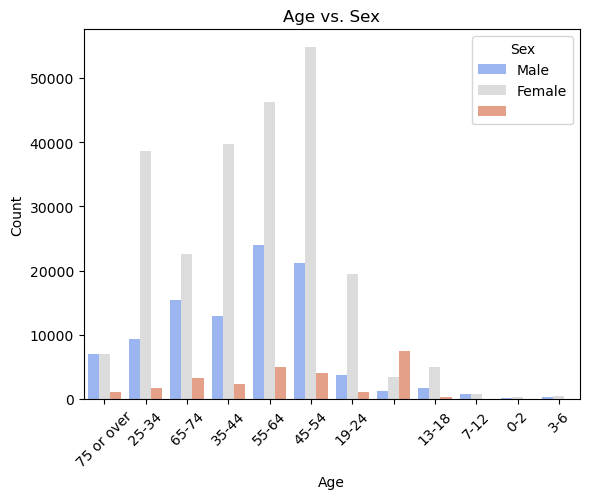

In [40]:
sns.countplot(data=data, x='Age', hue='Sex', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Age vs. Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()


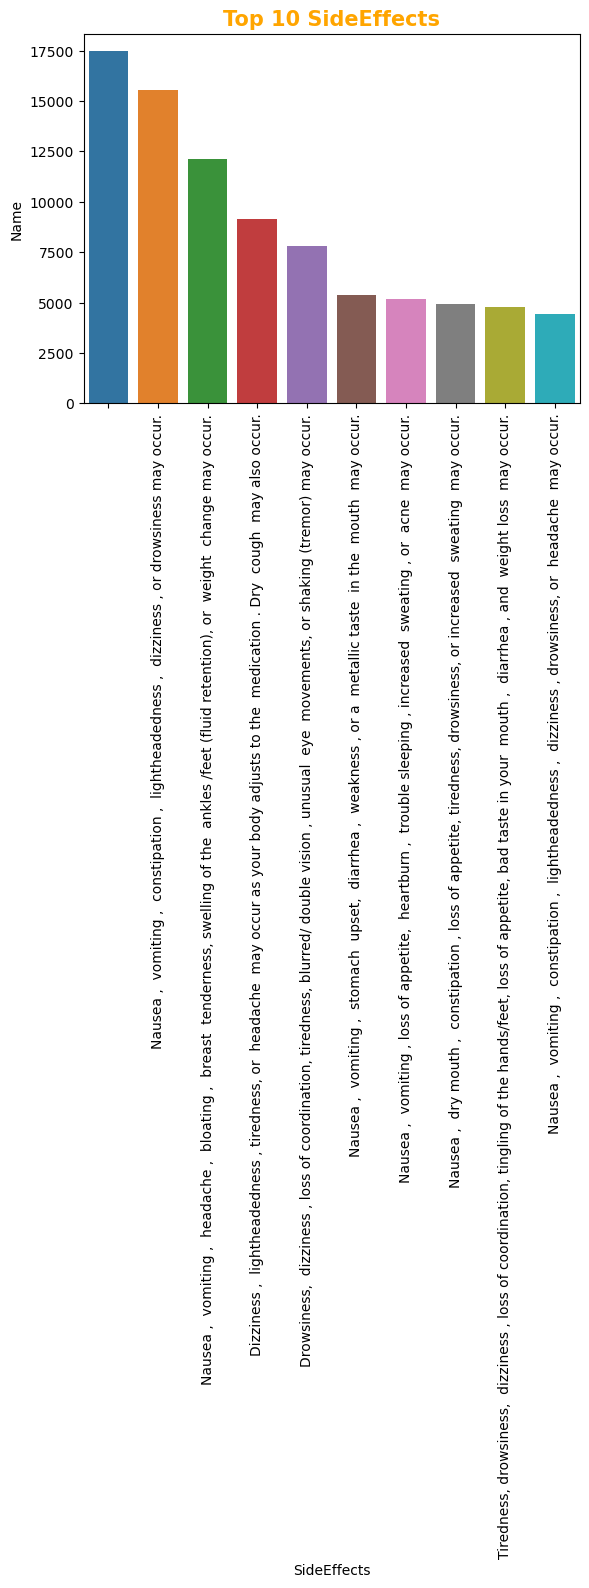

In [41]:
# Top 10 sideeffects based on No. of Users

data_= data['SideEffects'].value_counts().head(10).reset_index()
data_.columns = ['SideEffects', 'Name']
sns.barplot(data=data_, x = 'SideEffects', y = 'Name')
plt.title("Top 10 SideEffects",color='orange',fontweight='bold',fontsize = 15)
plt.xticks(rotation=90,fontsize=10)
plt.show()

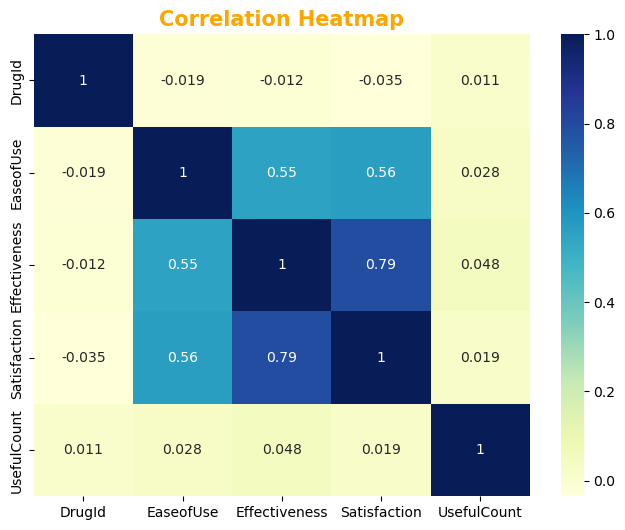

In [42]:
# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.title('Correlation Heatmap',color='orange',fontweight='bold',fontsize = 15)
plt.show()

# <font color='green'> Data Preprocessing</font>

In [43]:
# Check for missing values:

data.isna().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
SideEffects       0
UsefulCount       0
dtype: int64

Only in reviews column has missing values

In [44]:
# Filling the missing values in the review column of the dataset with unknown

data['Reviews'].fillna('Unknown', inplace=True)

In [45]:
# Again check for count of null values:

data.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
SideEffects      0
UsefulCount      0
dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Name           362806 non-null  object        
 1   Race           362806 non-null  object        
 2   Age            362806 non-null  object        
 3   Condition      362806 non-null  object        
 4   Date           362806 non-null  datetime64[ns]
 5   Drug           362806 non-null  object        
 6   DrugId         362806 non-null  int64         
 7   EaseofUse      362806 non-null  int64         
 8   Effectiveness  362806 non-null  int64         
 9   Reviews        362806 non-null  object        
 10  Satisfaction   362806 non-null  int64         
 11  Sex            362806 non-null  object        
 12  SideEffects    362806 non-null  object        
 13  UsefulCount    362806 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(8)
memory usa

In [47]:
data.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex',
       'SideEffects', 'UsefulCount'],
      dtype='object')

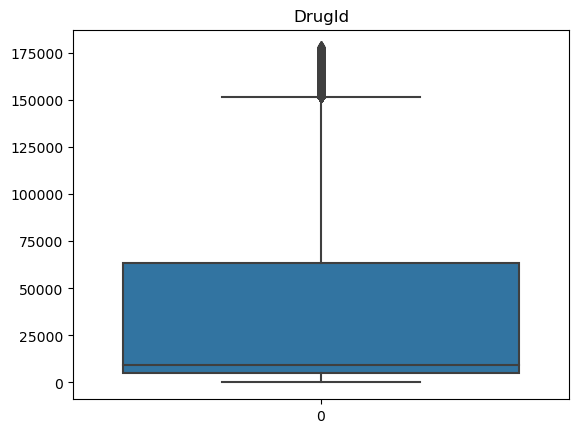

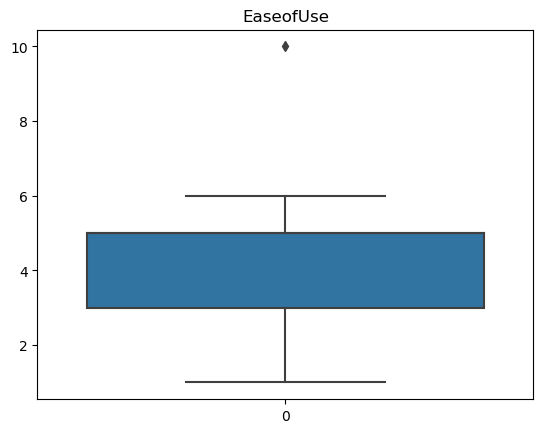

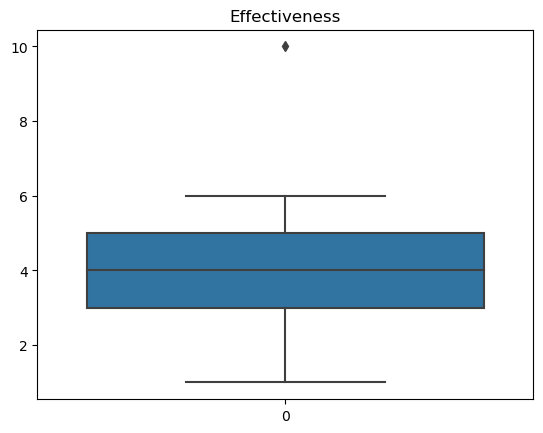

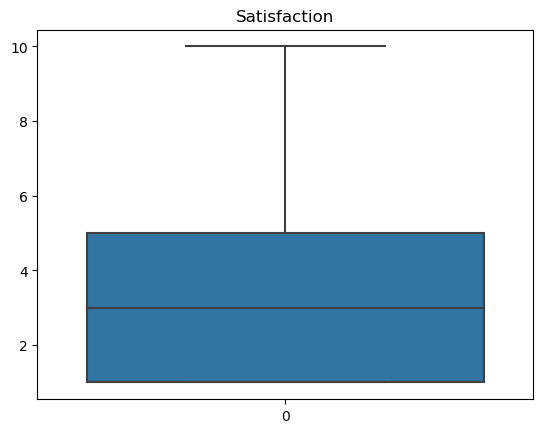

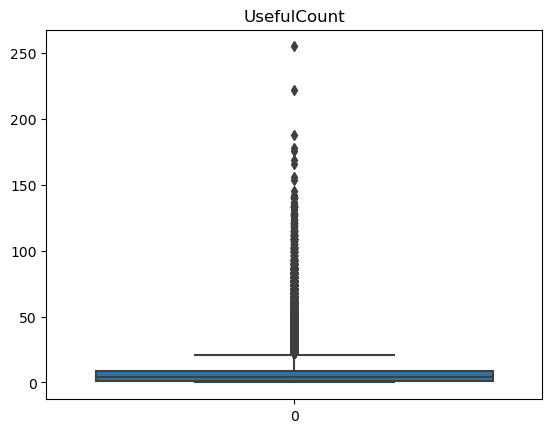

In [48]:
#create a boxplot to display outlier


num_cols = ['DrugId', 'EaseofUse',
       'Effectiveness','Satisfaction','UsefulCount']
for i in num_cols:
    plt.figure()
    sns.boxplot(data[i])
    plt.title(i)

There is outliers in 'DrugId', 'EaseofUse','Effectiveness' and 'UsefulCount' columns and nly one outlier in easeofuse and effectiveness

In [49]:
#finding the quartiles for 'UsefulCount'

Q1 = np.percentile(data['UsefulCount'],25,interpolation='midpoint')
Q2 = np.percentile(data['UsefulCount'],50,interpolation='midpoint')
Q3 = np.percentile(data['UsefulCount'],75,interpolation='midpoint')

#print the quartiles

print('Q1 =', Q1)
print('Q2 =', Q2)
print('Q3 =', Q3)


#Calculating interquartile range

IQR = Q3-Q1

#print iqr

print('IQR =',IQR)


#setting upper limit & lower limit and print values

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print('up_lim =',up_lim)
print('low_lim =',low_lim)

Q1 = 1.0
Q2 = 4.0
Q3 = 9.0
IQR = 8.0
up_lim = 21.0
low_lim = -11.0


In [50]:
outliers = []

for x in data ['UsefulCount'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)

In [51]:
#by using flooring and capping handle the outliers

data['UsefulCount'] = np.where(data['UsefulCount']>up_lim,up_lim,np.where(data['UsefulCount']<low_lim,low_lim,data['UsefulCount']))

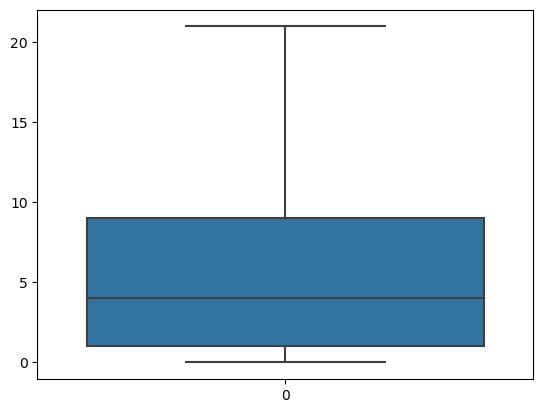

In [52]:
#boxplot with handled outliers

sns.boxplot(data['UsefulCount'])
plt.show()

# <font color='green'> Feature Engineering</font>

Selecting Dataset of a particular Drug to build the model

In [53]:
# Calculate the frequency of each drug
drugid_frequency = data['DrugId'].value_counts()

# Select the top drug based on frequency
most_common_drugid = drugid_frequency.idxmax()

# Find the drug associated with the most common DrugId
common_drug = data[data['DrugId'] == most_common_drugid]['Drug'].iloc[0]

# Find the conditions associated with the most common drug
common_drug_conditions = data[data['Drug'] == common_drug]['Condition'].unique()

# Print the most common DrugId, the associated drug, and the conditions
print(f"The most common DrugId is: {most_common_drugid}")
print(f"The drug associated with this DrugId is: {common_drug}")
print(f"The conditions associated with this drug are:")
for condition in common_drug_conditions:
    print(condition)

The most common DrugId is: 6873
The drug associated with this DrugId is: lisinopril solution
The conditions associated with this drug are:
High Blood Pressure
Other
Chronic Heart Failure
Migraine Prevention
Kidney Problem caused by Body Tissue Disease-Scleroderma
Prevention of Recurrent Atrial Fibrillation
Kidney Disease from Diabetes
Diastolic Heart Failure
Heart Attack
Failure of the Left Ventricle of the Heart
Nondiabetic Proteinuric Nephropathy
Retinal Changes of Eye in a Patient with Diabetes


# <font color='red'>Lisinopril solution drug with DrugId 6873 has been selected for building a classification model</font>

# <font color='green'> Dataset of Lisinopril Solution</font>

In [54]:
df1= data[data.Drug == 'lisinopril solution']

In [55]:
df1.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,SideEffects,UsefulCount
9197,Steven Costa,White,,High Blood Pressure,2020-02-29,lisinopril solution,6873,5,5,No Script or health Insurance needed to place ...,5,,"Dizziness , lightheadedness , tiredness, or ...",14.0
9203,Erin Morgan,Black,75 or over,High Blood Pressure,2020-02-08,lisinopril solution,6873,5,4,I have developed a very itch rash on my body f...,4,Female,"Dizziness , lightheadedness , tiredness, or ...",3.0
9209,Timothy Newman,Black,55-64,High Blood Pressure,2020-01-14,lisinopril solution,6873,4,5,"tried alternative medicine Beet root, hibiscus...",4,Male,"Dizziness , lightheadedness , tiredness, or ...",3.0
9215,Mike Stewart,Black,65-74,High Blood Pressure,2019-10-17,lisinopril solution,6873,5,5,Have been taking 10 mg doses per day for over ...,5,Male,"Dizziness , lightheadedness , tiredness, or ...",6.0
9221,Christopher Moon,Black,55-64,High Blood Pressure,2019-10-13,lisinopril solution,6873,2,4,I don't like that I'm taking this and not know...,2,Male,"Dizziness , lightheadedness , tiredness, or ...",12.0


In [56]:
df1.shape

(4269, 14)

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4269 entries, 9197 to 14254
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           4269 non-null   object        
 1   Race           4269 non-null   object        
 2   Age            4269 non-null   object        
 3   Condition      4269 non-null   object        
 4   Date           4269 non-null   datetime64[ns]
 5   Drug           4269 non-null   object        
 6   DrugId         4269 non-null   int64         
 7   EaseofUse      4269 non-null   int64         
 8   Effectiveness  4269 non-null   int64         
 9   Reviews        4269 non-null   object        
 10  Satisfaction   4269 non-null   int64         
 11  Sex            4269 non-null   object        
 12  SideEffects    4269 non-null   object        
 13  UsefulCount    4269 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 

In [58]:
#to remove unwanted labels and white spaces, check each column for errors

df1['Name'].unique()

array(['Steven Costa', 'Erin Morgan', 'Timothy Newman', ...,
       'Tyler Gonzalez', 'Christopher Hall', 'John Webb'], dtype=object)

In [59]:
df1['Race'].unique()

array(['White', 'Black', 'Hispanic', 'Asian'], dtype=object)

In [60]:
df1['Age'].unique()

array([' ', '75 or over', '55-64', '65-74', '25-34', '35-44', '45-54',
       '13-18', '19-24', '0-2', '7-12'], dtype=object)

Here there is an error

In [61]:
df1['Condition'].unique()

array(['High Blood Pressure', 'Other', 'Chronic Heart Failure',
       'Migraine Prevention',
       'Kidney Problem caused by Body Tissue Disease-Scleroderma',
       'Prevention of Recurrent Atrial Fibrillation',
       'Kidney Disease from Diabetes', 'Diastolic Heart Failure',
       'Heart Attack', 'Failure of the Left Ventricle of the Heart',
       'Nondiabetic Proteinuric Nephropathy',
       'Retinal Changes of Eye in a Patient with Diabetes'], dtype=object)

In [62]:
df1['EaseofUse'].unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [63]:
df1['Effectiveness'].unique()

array([5, 4, 1, 2, 3], dtype=int64)

In [64]:
df1['Reviews'].unique()

array(['No Script or health Insurance needed to place and order with 10% discount for all purchased. It was nice to have some from them, I just hit them at. WhatsApp only:+1(775)7735306,\nCall/Text:+1(775)7735306,\nWickr or Kik: peterking2014.\nEmail: peterkings2014@gmail.com.\nMessage code: (Med16) Discreet Delivery',
       "I have developed a very itch rash on my body for almost 5 years, I have also had hives, talked to my cardiologist to replace it with some other med but hasn't yet. I have had cortisone injections for the rash. Hopefully my cardiologist will prescribe another med SOONER than later.",
       'tried alternative medicine Beet root, hibiscus tea, Hawthorne and my BP was still high. I do cardio 5 to 7 days per week at 120 ht rate and still bp was high. I take Lisiniprol and my BP is about116/68 almost all the time now. High BP is nothing to play with it is the silent killer. I needed to use the big guns to get my BP down and that is Lisinopril, It is a wonderful drug t

In [65]:
df1['Satisfaction'].unique()

array([5, 4, 2, 1, 3], dtype=int64)

In [66]:
df1['Sex'].unique()

array([' ', 'Female', 'Male'], dtype=object)

In [67]:
df1.Sex.value_counts()

Female    2383
Male      1639
           247
Name: Sex, dtype: int64

In [68]:
df1.Age.value_counts()

55-64         1191
45-54         1111
65-74          766
35-44          531
75 or over     331
25-34          171
               135
19-24           28
13-18            3
0-2              1
7-12             1
Name: Age, dtype: int64

In [69]:
df1[df1['Age']== ' '].index

Int64Index([ 9197,  9302,  9347,  9521,  9686,  9725,  9737,  9815,  9879,
             9907,
            ...
            13896, 13904, 13977, 14000, 14033, 14151, 14217, 14232, 14233,
            14242],
           dtype='int64', length=135)

In [70]:
age=df1[df1['Age']== ' '].index

In [71]:
df1['Age'].mode()

0    55-64
Name: Age, dtype: object

In [72]:
df1['Age'][age]='55-64'

C:\Users\HP\AppData\Local\Temp\ipykernel_4292\3495216372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'][age]='55-64'
C:\Users\HP\AppData\Local\Temp\ipykernel_4292\3495216372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'][age]='55-64'


In [73]:
df1[df1['Age']== ' '].index

Int64Index([], dtype='int64')

In [74]:
df1['Sex'].unique()

array([' ', 'Female', 'Male'], dtype=object)

In [75]:
df1[df1['Sex']== ' '].index

Int64Index([ 9197,  9257,  9263,  9281,  9292,  9307,  9317,  9332,  9347,
             9387,
            ...
            13995, 14000, 14005, 14015, 14114, 14151, 14177, 14232, 14233,
            14242],
           dtype='int64', length=247)

In [76]:
sex=df1[df1['Sex']== ' '].index

In [77]:
df1['Sex'].mode()

0    Female
Name: Sex, dtype: object

In [78]:
df1['Sex'][sex]='Female'

C:\Users\HP\AppData\Local\Temp\ipykernel_4292\3967054378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sex'][sex]='Female'
C:\Users\HP\AppData\Local\Temp\ipykernel_4292\3967054378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sex'][sex]='Female'


In [79]:
df1[df1['Sex']== ' '].index

Int64Index([], dtype='int64')

In [80]:
df1.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,SideEffects,UsefulCount
9197,Steven Costa,White,55-64,High Blood Pressure,2020-02-29,lisinopril solution,6873,5,5,No Script or health Insurance needed to place ...,5,Female,"Dizziness , lightheadedness , tiredness, or ...",14.0
9203,Erin Morgan,Black,75 or over,High Blood Pressure,2020-02-08,lisinopril solution,6873,5,4,I have developed a very itch rash on my body f...,4,Female,"Dizziness , lightheadedness , tiredness, or ...",3.0
9209,Timothy Newman,Black,55-64,High Blood Pressure,2020-01-14,lisinopril solution,6873,4,5,"tried alternative medicine Beet root, hibiscus...",4,Male,"Dizziness , lightheadedness , tiredness, or ...",3.0
9215,Mike Stewart,Black,65-74,High Blood Pressure,2019-10-17,lisinopril solution,6873,5,5,Have been taking 10 mg doses per day for over ...,5,Male,"Dizziness , lightheadedness , tiredness, or ...",6.0
9221,Christopher Moon,Black,55-64,High Blood Pressure,2019-10-13,lisinopril solution,6873,2,4,I don't like that I'm taking this and not know...,2,Male,"Dizziness , lightheadedness , tiredness, or ...",12.0


In [81]:
df1.shape

(4269, 14)

# <font color='green'> EDA on Licinopril</font>

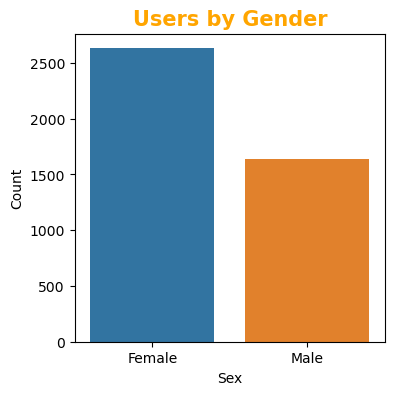

In [82]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=df1)
plt.title('Users by Gender',color='orange',fontweight='bold',fontsize = 15)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show()

Text(0.5, 1.0, 'Users by Race and Gender')

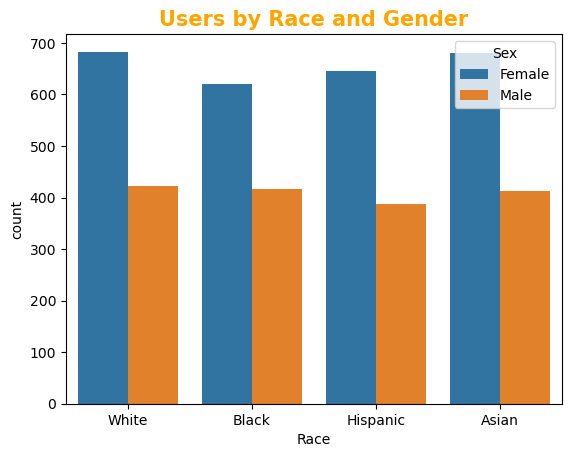

In [83]:
sns.countplot(x='Race',hue='Sex',data=df1)
plt.title("Users by Race and Gender",color='orange',fontweight='bold',fontsize = 15)

Text(0.5, 1.0, 'Users by Age and Gender')

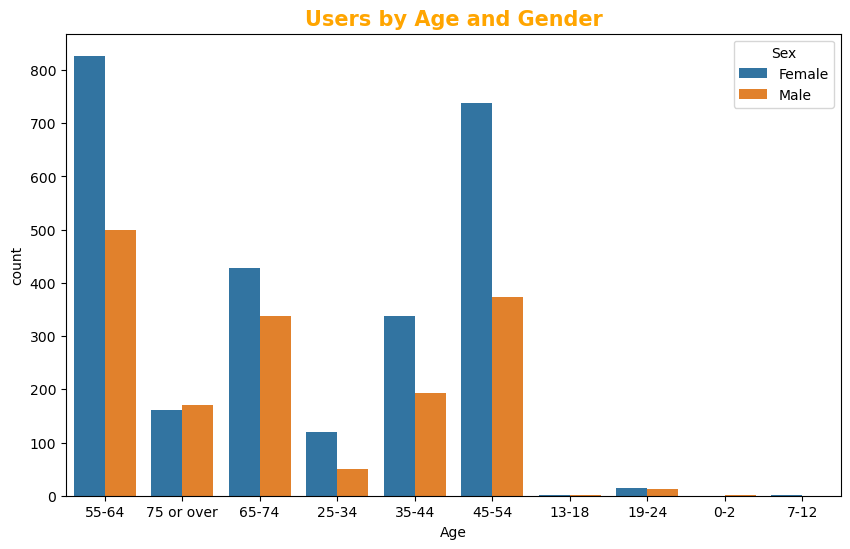

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=df1)
plt.title("Users by Age and Gender",color='orange',fontweight='bold',fontsize = 15)

Text(0, 0.5, 'Count')

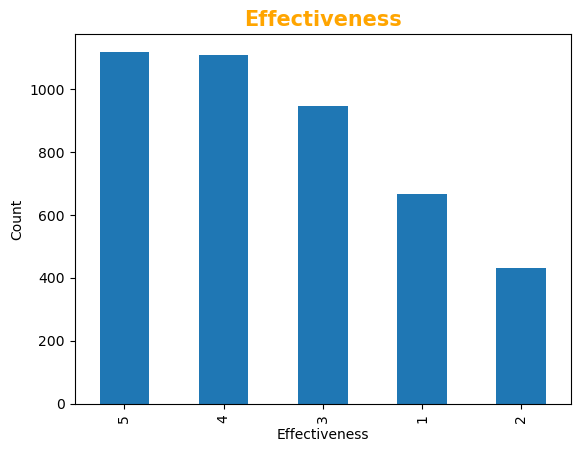

In [85]:
df1['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness",color='orange',fontweight='bold',fontsize = 15)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

Text(0, 0.5, 'Count')

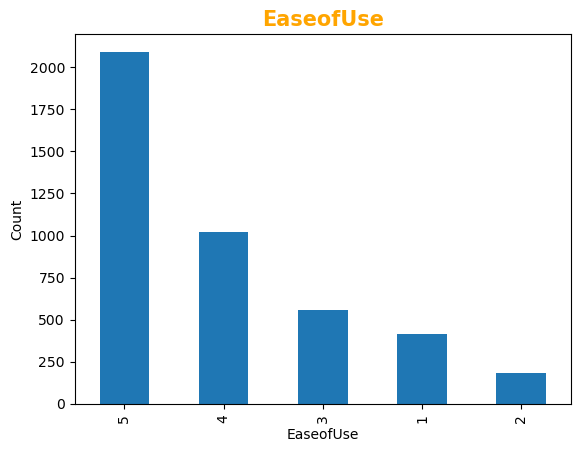

In [86]:
df1['EaseofUse'].value_counts().plot(kind='bar')
plt.title("EaseofUse",color='orange',fontweight='bold',fontsize = 15)
plt.xlabel("EaseofUse", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

Text(0, 0.5, 'Satisfaction')

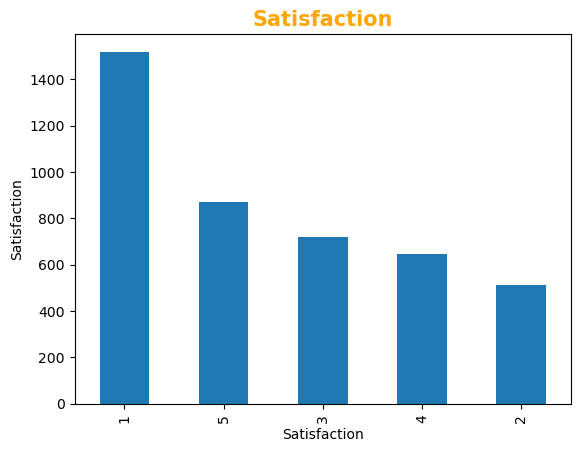

In [87]:
df1['Satisfaction'].value_counts().plot(kind='bar')
plt.title("Satisfaction",color='orange',fontweight='bold',fontsize = 15)
plt.xlabel("Satisfaction", fontsize = 10)
plt.ylabel("Satisfaction", fontsize = 10)

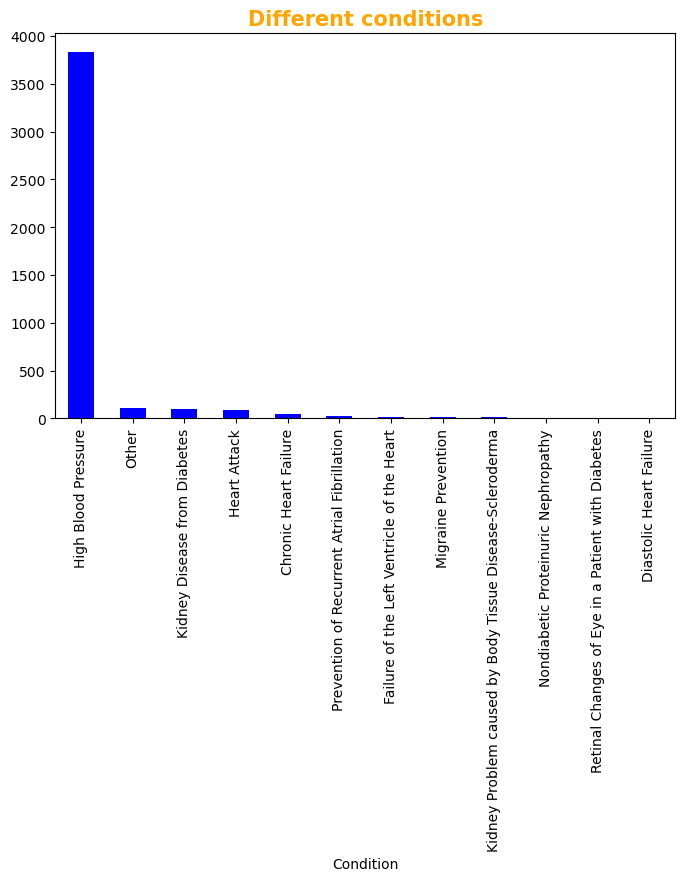

In [88]:
plt.subplots(figsize=(8,5))
df1['Condition'].value_counts().head(15).plot(kind='bar',color='blue')
plt.title('Different conditions',color='orange',fontweight='bold',fontsize = 15)
plt.xlabel('Condition')
plt.show()

<Figure size 1000x800 with 0 Axes>

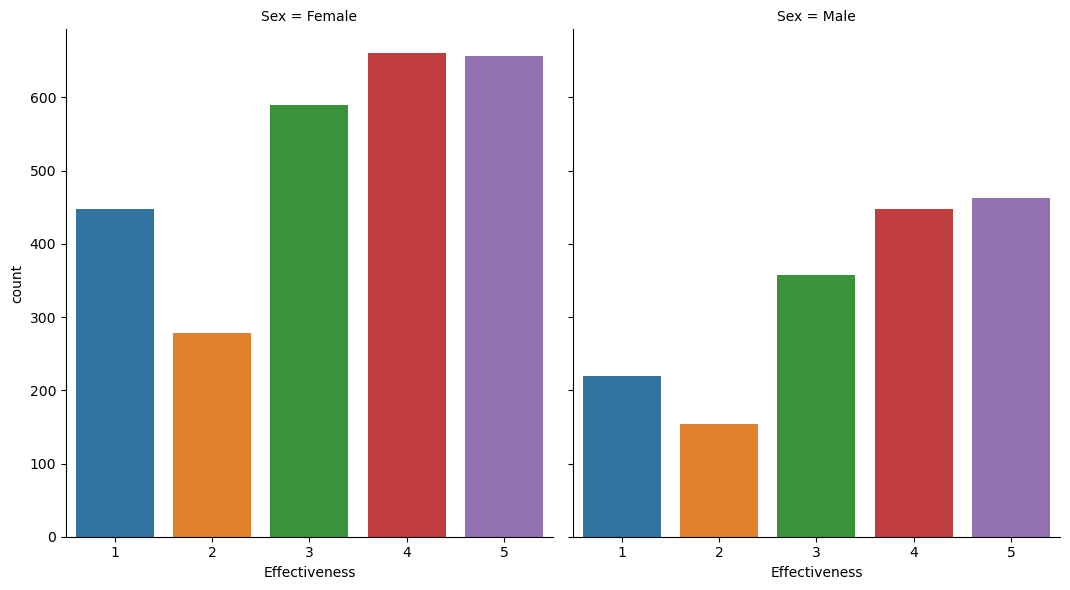

In [89]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=df1, kind="count",
                height=6,aspect =.9);

<Axes: xlabel='Age', ylabel='count'>

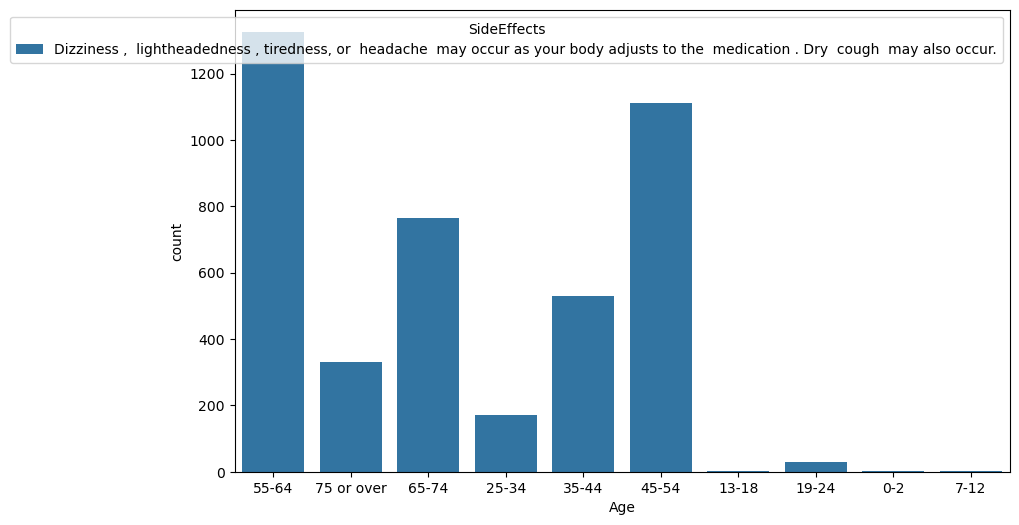

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='SideEffects',data=df1)

# <font color='green'> Feature Reduction</font>

In [91]:
#Removing unwanted columns

df1 = df1.drop(['Name','Date','Drug','DrugId','Reviews','SideEffects'],axis=1)

In [92]:
df1.columns

Index(['Race', 'Age', 'Condition', 'EaseofUse', 'Effectiveness',
       'Satisfaction', 'Sex', 'UsefulCount'],
      dtype='object')

In [93]:
df1.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
9197,White,55-64,High Blood Pressure,5,5,5,Female,14.0
9203,Black,75 or over,High Blood Pressure,5,4,4,Female,3.0
9209,Black,55-64,High Blood Pressure,4,5,4,Male,3.0
9215,Black,65-74,High Blood Pressure,5,5,5,Male,6.0
9221,Black,55-64,High Blood Pressure,2,4,2,Male,12.0


In [94]:
df1.shape

(4269, 8)

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4269 entries, 9197 to 14254
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Race           4269 non-null   object 
 1   Age            4269 non-null   object 
 2   Condition      4269 non-null   object 
 3   EaseofUse      4269 non-null   int64  
 4   Effectiveness  4269 non-null   int64  
 5   Satisfaction   4269 non-null   int64  
 6   Sex            4269 non-null   object 
 7   UsefulCount    4269 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 429.2+ KB


# <font color='green'> Encoding</font>


In [96]:
df1 = pd.get_dummies(df1)

In [97]:
df1.head()

,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_0-2,Age_13-18,...,Condition_High Blood Pressure,Condition_Kidney Disease from Diabetes,Condition_Kidney Problem caused by Body Tissue Disease-Scleroderma,Condition_Migraine Prevention,Condition_Nondiabetic Proteinuric Nephropathy,Condition_Other,Condition_Prevention of Recurrent Atrial Fibrillation,Condition_Retinal Changes of Eye in a Patient with Diabetes,Sex_Female,Sex_Male
9197,5,5,5,14.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9203,5,4,4,3.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9209,4,5,4,3.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9215,5,5,5,6.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9221,2,4,2,12.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [98]:
df1.columns

Index(['EaseofUse', 'Effectiveness', 'Satisfaction', 'UsefulCount',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_White', 'Age_0-2',
       'Age_13-18', 'Age_19-24', 'Age_25-34', 'Age_35-44', 'Age_45-54',
       'Age_55-64', 'Age_65-74', 'Age_7-12', 'Age_75 or over',
       'Condition_Chronic Heart Failure', 'Condition_Diastolic Heart Failure',
       'Condition_Failure of the Left Ventricle of the Heart',
       'Condition_Heart Attack', 'Condition_High Blood Pressure',
       'Condition_Kidney Disease from Diabetes',
       'Condition_Kidney Problem caused by Body Tissue Disease-Scleroderma',
       'Condition_Migraine Prevention',
       'Condition_Nondiabetic Proteinuric Nephropathy', 'Condition_Other',
       'Condition_Prevention of Recurrent Atrial Fibrillation',
       'Condition_Retinal Changes of Eye in a Patient with Diabetes',
       'Sex_Female', 'Sex_Male'],
      dtype='object')

In [99]:
# Check the distribution of the target variable:

effectiveness_counts = df1['Effectiveness'].value_counts()

# Print
print(effectiveness_counts)

5    1118
4    1107
3     946
1     666
2     432
Name: Effectiveness, dtype: int64


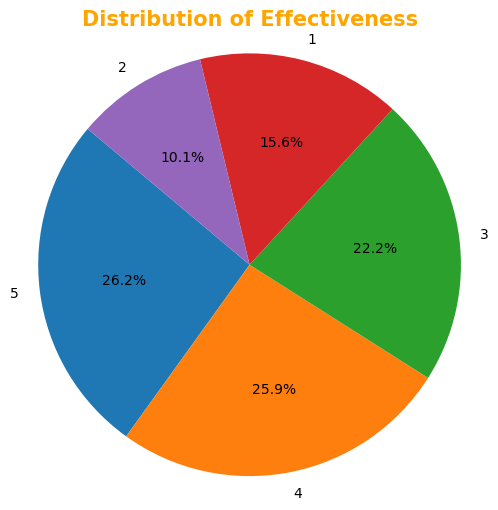

In [100]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(effectiveness_counts, labels=effectiveness_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Effectiveness',color='orange',fontweight='bold',fontsize = 15)
plt.axis('equal') 

# Show the pie chart
plt.show()

# <font color='green'> Splitting the dataset into training and testing</font>


In [101]:
# Selecting Target(y) column and Feature(x) columns

X = df1.drop(['Effectiveness'],axis=1) #Independent variable
y = df1['Effectiveness'] #Dependent variable

In [102]:
# Mapping the numerical ratings in the 'Effectiveness' column with the corresponding Side Effects:

y = y.replace({
    1: 'Extreme Severe Side Effects',
    2: 'Severe Side Effects',
    3: 'Moderate Side Effects',
    4: 'Mild Side Effects',
    5: 'No Side Effects'
})

In [103]:
y.head()

9197      No Side Effects
9203    Mild Side Effects
9209      No Side Effects
9215      No Side Effects
9221    Mild Side Effects
Name: Effectiveness, dtype: object

In [104]:
# Hold Out Techiniques:


#Split the data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

# <font color='green'>Machine Learning Algorithms</font>


# 1.kNN Classifier

In [105]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)   # Set the desired range 
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model1 = classifier.fit(X_train,y_train)
    y_pred = model1.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

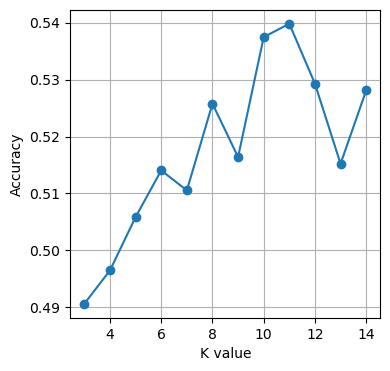

In [106]:
# Plot the number of neighbors (k value) and the corresponding accuracy metric:

plt.figure(figsize=(4,4))
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [108]:
model1 = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski',p=2)
model1.fit(X_train,y_train)   


KNeighborsClassifier(n_neighbors=11)

In [109]:
y_pred_knn = model1.predict(X_test)   
cm = confusion_matrix(y_test,y_pred_knn)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred_knn))
print('Recall is',recall_score(y_test, y_pred_knn,average='micro'))
print('Precision is',precision_score(y_test, y_pred_knn,average='micro'))
print('f1',f1_score(y_test, y_pred_knn, average='micro'))

[[ 91  22  18   1   6]
 [ 18 122  34  38   2]
 [ 21  71  70  10  10]
 [ 15  32  11 167   5]
 [ 32  18  23   6  11]]
Accuracy is 0.5398126463700235
Recall is 0.5398126463700235
Precision is 0.5398126463700235
f1 0.5398126463700235


# 2.Decision Tree Classifier

In [110]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [111]:
y_pred_dt = model2.predict(X_test)
cm = confusion_matrix(y_test,y_pred_dt)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred_dt))
print('Recall is',recall_score(y_test, y_pred_dt,average='micro'))
print('Precision is',precision_score(y_test, y_pred_dt,average='micro'))
print('f1',f1_score(y_test, y_pred_dt, average='micro'))

[[ 69  13  22  10  24]
 [ 13 107  48  36  10]
 [ 21  53  73  15  20]
 [  5  62  23 133   7]
 [ 23  16  19   6  26]]
Accuracy is 0.477751756440281
Recall is 0.477751756440281
Precision is 0.477751756440281
f1 0.477751756440281


# 3.Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators = 100,max_depth = 20,criterion = 'entropy',min_samples_split = 3)
model3.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3)

In [113]:
y_pred_rf = model3.predict(X_test)
cm = confusion_matrix(y_test,y_pred_rf)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred_rf))
print('Recall is',recall_score(y_test, y_pred_rf,average='micro'))
print('Precision is',precision_score(y_test, y_pred_rf,average='micro'))
print('f1',f1_score(y_test, y_pred_rf, average='micro'))

[[ 78  14  22   7  17]
 [ 14 117  44  32   7]
 [ 23  41  81  17  20]
 [  7  40  18 160   5]
 [ 24  15  22   7  22]]
Accuracy is 0.5362997658079626
Recall is 0.5362997658079626
Precision is 0.5362997658079626
f1 0.5362997658079626


# 4. Naive Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(X_train,y_train)

GaussianNB()

In [115]:
y_pred_nb = model4.predict(X_test)
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred_nb))
print('Recall is',recall_score(y_test, y_pred_nb,average='micro'))
print('Precision is',precision_score(y_test, y_pred_nb,average='micro'))
print('f1',f1_score(y_test, y_pred_nb, average='micro'))

[[  7   3   0   0 128]
 [  3   7   2   0 202]
 [  5   2   0   0 175]
 [  1   4   6   0 219]
 [  4   0   0   0  86]]
Accuracy is 0.117096018735363
Recall is 0.117096018735363
Precision is 0.117096018735363
f1 0.117096018735363


# 5.Support Vector Machine (SVM)

In [116]:
model5 = SVC(kernel='rbf')
model5.fit(X_train, y_train)


SVC()

In [117]:
y_pred_svm = model5.predict(X_test)
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred_svm))
print('Recall is',recall_score(y_test, y_pred_svm,average='micro'))
print('Precision is',precision_score(y_test, y_pred_svm,average='micro'))
print('f1',f1_score(y_test, y_pred_svm, average='micro'))

[[113   9  16   0   0]
 [ 18 130  35  31   0]
 [ 38  54  78  12   0]
 [ 15  38   9 168   0]
 [ 46  15  28   1   0]]
Accuracy is 0.572599531615925
Recall is 0.572599531615925
Precision is 0.572599531615925
f1 0.572599531615925


# 6.Logistic Regression Classifier

In [118]:
model6 = LogisticRegression()
model6.fit(X_train , y_train) 


LogisticRegression()

In [119]:
y_pred_lr = model6.predict(X_test) 
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred_lr))
print('Recall is',recall_score(y_test, y_pred_lr,average='micro'))
print('Precision is',precision_score(y_test, y_pred_lr,average='micro'))
print('f1',f1_score(y_test, y_pred_lr, average='micro'))

[[104  11  23   0   0]
 [ 19  97  34  64   0]
 [ 39  53  67  23   0]
 [  4  23  19 184   0]
 [ 42  10  36   2   0]]
Accuracy is 0.5292740046838408
Recall is 0.5292740046838408
Precision is 0.5292740046838408
f1 0.5292740046838408


# 7.Gradient Boosting

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
model7 = GradientBoostingClassifier()
model7.fit(X_train,y_train)

GradientBoostingClassifier()

In [121]:
y_pred_gb = model7.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gb)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred_gb))
print('Recall is',recall_score(y_test, y_pred_gb,average='micro'))
print('Precision is',precision_score(y_test, y_pred_gb,average='micro'))
print('f1',f1_score(y_test, y_pred_gb, average='micro'))

[[ 84  22  17  12   3]
 [  9 140  41  22   2]
 [ 18  43  90  18  13]
 [ 13  28  22 166   1]
 [ 21  16  23   9  21]]
Accuracy is 0.5866510538641686
Recall is 0.5866510538641686
Precision is 0.5866510538641686
f1 0.5866510538641686


In [122]:
accuracies = {
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'kNN': accuracy_score(y_test, y_pred_knn),
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Navie':accuracy_score(y_test, y_pred_nb),
    'gradient':accuracy_score(y_test, y_pred_gb)
}

max_accuracy = max(accuracies.values())

# Find the best models with the maximum accuracy
best_models = [model for model, accuracy in accuracies.items() if accuracy == max_accuracy]

# Print the best models
print("Best Model:")
for model in best_models:
    print(model)

print('Max Accuracy:', max_accuracy)

Best Model:
gradient
Max Accuracy: 0.5866510538641686


# <font color='green'> Hyperparameter Tuning</font>

In [123]:
# Create a GradientBoostingClassifier
model = GradientBoostingClassifier()

# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new model with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params)

# Train the model with the best hyperparameters on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = best_model.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:")
print(cm)
print('Accuracy is', accuracy_score(y_test, y_pred_gb))
print('Recall is', recall_score(y_test, y_pred_gb, average='micro'))
print('Precision is', precision_score(y_test, y_pred_gb, average='micro'))
print('F1', f1_score(y_test, y_pred_gb, average='micro'))

Confusion Matrix:
[[ 89  20  16  11   2]
 [ 10 142  39  22   1]
 [ 21  43  95  17   6]
 [ 11  31  18 169   1]
 [ 19  16  28   9  18]]
Accuracy is 0.6007025761124122
Recall is 0.6007025761124122
Precision is 0.6007025761124122
F1 0.6007025761124122


# <font color='green'> Conclusion</font>

The best algorithm to fit the model is Gradient Boosting Algorithm. The algorithm classifies the side effects of drug based on Race, Age, Condition, EaseofUse, Satisfaction, Sex.